In [1]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [2]:
bear_types = 'grizzly','black','teddy'
path = Path('Data/bears')

In [3]:
fns = get_image_files(path)
fns

(#1084) [Path('Data/bears/teddy/teddy-bear-on-carousel-horse-15011-2.jpg'),Path('Data/bears/teddy/Teddy-Bear-Tattoos-for-Men.jpg'),Path('Data/bears/teddy/T.R.-Bear.jpg'),Path('Data/bears/teddy/cycle-teddy-love-stick9_1537854295_l.jpg'),Path('Data/bears/teddy/sad-teddy-bear-in-forest.jpg'),Path('Data/bears/teddy/383951,xcitefun-teddy-bear-2.jpg'),Path('Data/bears/teddy/Dark_tan_red_scarf_1_2f691252-1aed-4.png'),Path('Data/bears/teddy/chowder-dog-chow-chow-looks-like-gia.jpg'),Path('Data/bears/teddy/220px-Teddy_bear_-_Rory.JPG'),Path('Data/bears/teddy/LED-teddy-bear-1.jpg')...]

In [4]:
failed = verify_images(fns)
failed

(#0) []

In [5]:
failed.map(Path.unlink);

In [6]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = bears.dataloaders(path)

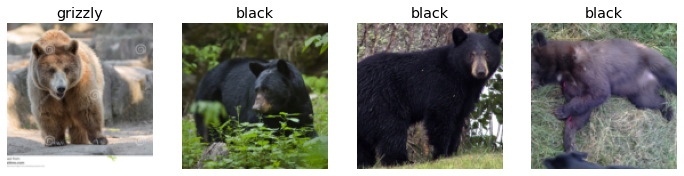

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

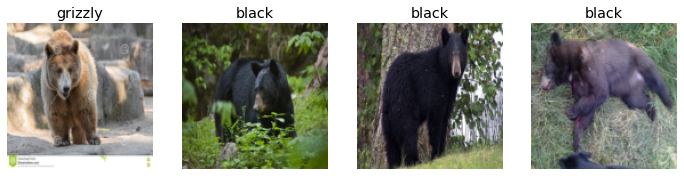

In [9]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

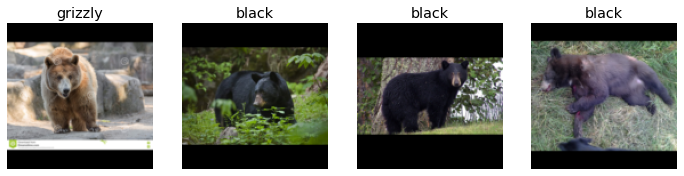

In [10]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

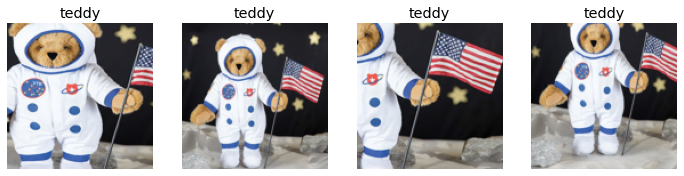

In [11]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

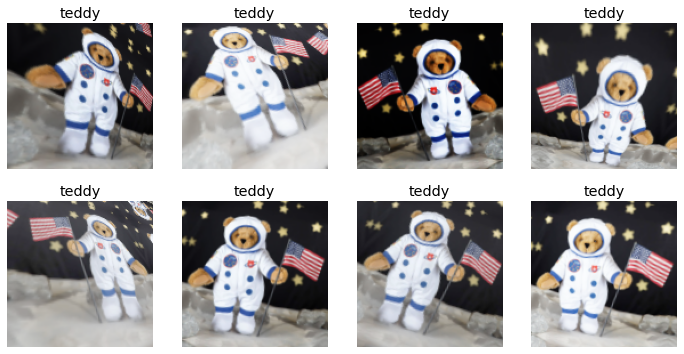

In [12]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [13]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.138718,0.255650,0.083333,00:08


/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.341935,0.215631,0.078704,00:10
1,0.273796,0.207956,0.078704,00:10
2,0.220035,0.189087,0.060185,00:09
3,0.187225,0.183462,0.055556,00:10


/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


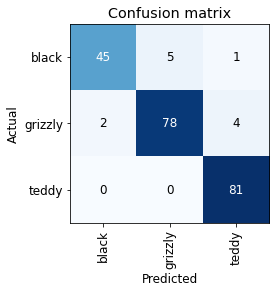

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

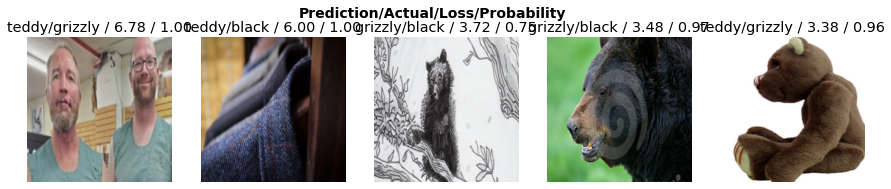

In [17]:
interp.plot_top_losses(5,nrows=1)

In [18]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/bruce/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [19]:
#for deleting
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

In [ ]:
#for changing the category
for idx, cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]),path/cat)

In [22]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('images/g_a.jpeg')

('grizzly', tensor(1), tensor([8.5622e-07, 1.0000e+00, 2.2058e-07]))

In [30]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [31]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [32]:
img = PILImage.create(btn_upload.data[-1])

In [33]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [34]:
pred,pred_idx,probs = learn_inf.predict(img)

In [35]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [36]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [37]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [38]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [40]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [42]:
#hide
# !pip install voila # For this alread installed no need to run pip
# !jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /home/bruce/anaconda3/envs/fastai_v1/etc/jupyter
    - Validating...
      voila 0.2.4 OK
